## Getting Ready

**Before we start downloading the data set, we need the Kaggle API token. To get that**

    1) Login into your Kaggle account

    2) Get into your account settings page

    3) Click on Create a new API token
    
    4) This will prompt you to download the .json file into your system. Save the file, and we will use it in the next step.

## Data Preprocessing

In [1]:
# Config sys path and display
import sys
import warnings
import pandas as pd
sys.path.append('../')
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

# Import library
from sklearn.model_selection import train_test_split
from src.data.make_dataset import download_and_load, upload
from src.features.pre_processing import preprocess
from src.models.lazy_predict import lazy_predict
from src.models.train_model import train
from src.models.predict_model import predict
from src.visualization.visualize import *
# from src.features.build_features import

In [2]:
# Download and load dataset 
download_path = "../data/raw"
data = download_and_load(download_path)
data.head(5)

Skipping, found downloaded files in "../data/raw\dataset-phishing-domain-detection-cybersecurity" (use force=True to force download)


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.25,1,13335,1640,551,2,2,5,292,0,-1,0,0,0,1
1,2,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,329,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,24,0,0,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,305,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.25,1,14618,-1,-1,2,4,2,52,0,1,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,24,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.53,0,13335,5355,123,2,2,0,298,1,1,0,0,0,0
3,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,17,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.11,1,36352,-1,-1,1,2,5,1792,0,0,0,0,0,1
4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,23,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.17,0,-1,7865,1631,1,2,1,299,1,1,0,0,0,0


In [3]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# # from pycebox.ice import ice, ice_plot
# # import shap
# # from subprocess import call
# # from IPython.display import Image
# # from lime import lime_tabular, lime_text

# import sklearn
# from sklearn import preprocessing
# from sklearn import tree
# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
# from sklearn.tree import export_graphviz
# from sklearn.tree import DecisionTreeClassifier
# # from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# # from tune_sklearn import TuneGridSearchCV
# from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


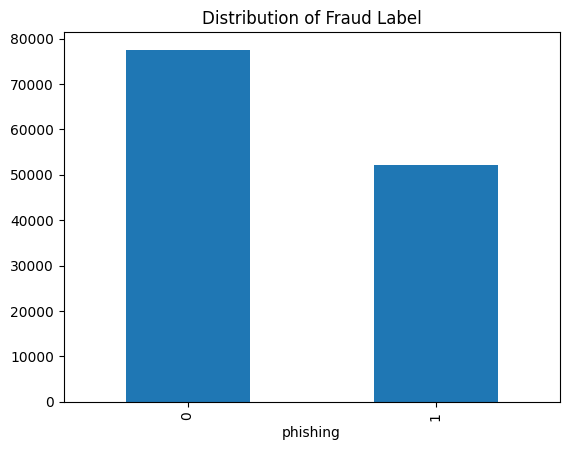

In [4]:
# Data Preprocessing and visualize data before training
upload_path = "../data/processed"
data = upload(preprocess(data), upload_path)
pre_plot(data)

In [5]:
# Overview of data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129698 entries, 0 to 129697
Data columns (total 99 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   qty_dot_url                 129698 non-null  float64
 1   qty_hyphen_url              129698 non-null  float64
 2   qty_underline_url           129698 non-null  float64
 3   qty_slash_url               129698 non-null  float64
 4   qty_questionmark_url        129698 non-null  float64
 5   qty_equal_url               129698 non-null  float64
 6   qty_at_url                  129698 non-null  float64
 7   qty_and_url                 129698 non-null  float64
 8   qty_exclamation_url         129698 non-null  float64
 9   qty_space_url               129698 non-null  float64
 10  qty_tilde_url               129698 non-null  float64
 11  qty_comma_url               129698 non-null  float64
 12  qty_plus_url                129698 non-null  float64
 13  qty_asterisk_u

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00,129698.00
mean,0.05,0.01,0.01,0.03,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.01,0.09,0.01,0.00,0.00,0.09,0.06,0.00,0.00,0.04,0.03,0.03,0.09,0.54,0.09,0.01,0.02,0.05,0.05,0.09,0.09,0.03,0.01,0.54,0.05,0.00,0.01,0.06,0.03,0.03,0.54,0.54,0.14,0.18,0.14,0.11,0.05,0.11,0.09,0.03,0.01,0.54,0.54,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.02,0.05,0.01,0.01,0.02,0.10,0.02,0.00,0.00,0.06,0.01,0.02,0.05,0.49,0.08,0.18,0.01,0.09,0.14,0.09,0.01,0.51,0.07,0.50,0.50,0.01,0.40
std,0.06,0.03,0.03,0.04,0.01,0.04,0.01,0.04,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.04,0.04,0.01,0.00,0.04,0.03,0.05,0.06,0.05,0.05,0.04,0.10,0.50,0.09,0.01,0.02,0.05,0.05,0.08,0.08,0.03,0.01,0.50,0.05,0.01,0.02,0.06,0.04,0.03,0.50,0.50,0.13,0.17,0.13,0.10,0.05,0.10,0.08,0.03,0.01,0.50,0.50,0.01,0.01,0.04,0.02,0.03,0.01,0.03,0.05,0.04,0.05,0.03,0.06,0.15,0.03,0.04,0.06,0.30,0.06,0.02,0.01,0.20,0.04,0.14,0.04,0.28,0.12,0.17,0.03,0.04,0.07,0.09,0.02,0.50,0.04,0.03,0.03,0.08,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

Further feature selection could be done after evaluating feature importance

## Lazy Prediction

Lazy prediction runs multiple classification models.

In [6]:
# Lazy prediction
lazy_predict(data, exclude=None)

  4%|▍         | 1/25 [00:24<09:51, 24.66s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9265227447956823, 'Balanced Accuracy': 0.9231239206302253, 'ROC AUC': 0.9231239206302253, 'F1 Score': 0.9264877067301567, 'Time taken': 24.663487672805786}


  8%|▊         | 2/25 [00:54<10:42, 27.92s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9841557440246723, 'Balanced Accuracy': 0.9831084593438619, 'ROC AUC': 0.9831084593438619, 'F1 Score': 0.9841490798972385, 'Time taken': 30.192288637161255}


 12%|█▏        | 3/25 [00:56<05:48, 15.86s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.8402852737085582, 'Balanced Accuracy': 0.8623674673478425, 'ROC AUC': 0.8623674673478425, 'F1 Score': 0.8415394061669077, 'Time taken': 1.5194118022918701}


 16%|█▌        | 4/25 [00:57<03:30, 10.01s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 20%|██        | 5/25 [01:03<02:48,  8.42s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9798766383962991, 'Balanced Accuracy': 0.9789648829373655, 'ROC AUC': 0.9789648829373655, 'F1 Score': 0.9798744210026621, 'Time taken': 5.605775833129883}


 24%|██▍       | 6/25 [01:04<01:52,  5.95s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.5978797224363916, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.44741810973803947, 'Time taken': 1.1356806755065918}


 28%|██▊       | 7/25 [01:06<01:23,  4.65s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9761372397841171, 'Balanced Accuracy': 0.9757591929931007, 'ROC AUC': 0.9757591929931005, 'F1 Score': 0.9761506978970071, 'Time taken': 1.9707756042480469}


 32%|███▏      | 8/25 [01:45<04:24, 15.55s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9874710871241326, 'Balanced Accuracy': 0.9870895347402322, 'ROC AUC': 0.9870895347402323, 'F1 Score': 0.9874725572034386, 'Time taken': 38.896724224090576}


 36%|███▌      | 9/25 [01:46<02:58, 11.18s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.7288743253662298, 'Balanced Accuracy': 0.6700366595133089, 'ROC AUC': 0.6700366595133088, 'F1 Score': 0.6949262531145344, 'Time taken': 1.560938835144043}


 40%|████      | 10/25 [02:02<03:11, 12.74s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9579799537393986, 'Balanced Accuracy': 0.9563839772180489, 'ROC AUC': 0.9563839772180488, 'F1 Score': 0.957983244189513, 'Time taken': 16.22099471092224}


 44%|████▍     | 11/25 [02:03<02:06,  9.02s/it]

LabelPropagation model failed to execute
Unable to allocate 80.2 GiB for an array with shape (103758, 103758) and data type float64


 48%|████▊     | 12/25 [02:03<01:23,  6.44s/it]

LabelSpreading model failed to execute
Unable to allocate 80.2 GiB for an array with shape (103758, 103758) and data type float64


 52%|█████▏    | 13/25 [02:06<01:04,  5.40s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9033924441017733, 'Balanced Accuracy': 0.911203905780408, 'ROC AUC': 0.911203905780408, 'F1 Score': 0.9041737744796897, 'Time taken': 2.99353289604187}


 56%|█████▌    | 14/25 [02:10<00:53,  4.86s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.9223592906707787, 'Balanced Accuracy': 0.9210702888867217, 'ROC AUC': 0.9210702888867217, 'F1 Score': 0.9224926061877424, 'Time taken': 3.6060001850128174}


 60%|██████    | 15/25 [02:11<00:36,  3.61s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.8402852737085582, 'Balanced Accuracy': 0.8623674673478425, 'ROC AUC': 0.8623674673478425, 'F1 Score': 0.8415394061669077, 'Time taken': 0.7257547378540039}


 64%|██████▍   | 16/25 [02:12<00:25,  2.86s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.905242868157286, 'Balanced Accuracy': 0.9064892098890394, 'ROC AUC': 0.9064892098890394, 'F1 Score': 0.9056549098317407, 'Time taken': 1.103628158569336}


 68%|██████▊   | 17/25 [02:13<00:18,  2.29s/it]

{'Model': 'Perceptron', 'Accuracy': 0.8913646877409407, 'Balanced Accuracy': 0.8814169949618537, 'ROC AUC': 0.8814169949618537, 'F1 Score': 0.8906597530503608, 'Time taken': 0.984994649887085}


 72%|███████▏  | 18/25 [02:15<00:16,  2.36s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.7071318427139552, 'Balanced Accuracy': 0.6371948211898251, 'ROC AUC': 0.6371948211898252, 'F1 Score': 0.6544982209718777, 'Time taken': 2.505854606628418}


 76%|███████▌  | 19/25 [02:38<00:50,  8.45s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9883191981495759, 'Balanced Accuracy': 0.9878458844215374, 'ROC AUC': 0.9878458844215375, 'F1 Score': 0.9883191064667579, 'Time taken': 22.653064727783203}


 80%|████████  | 20/25 [02:40<00:31,  6.35s/it]

{'Model': 'RidgeClassifier', 'Accuracy': 0.9037008481110255, 'Balanced Accuracy': 0.9114304311438587, 'ROC AUC': 0.9114304311438587, 'F1 Score': 0.9044760771502401, 'Time taken': 1.4533822536468506}


 84%|████████▍ | 21/25 [02:44<00:22,  5.71s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.9035851966075559, 'Balanced Accuracy': 0.9113337131091692, 'ROC AUC': 0.9113337131091691, 'F1 Score': 0.9043622635179099, 'Time taken': 4.198689222335815}


 88%|████████▊ | 22/25 [02:47<00:14,  4.83s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.9158057054741712, 'Balanced Accuracy': 0.9185558981499784, 'ROC AUC': 0.9185558981499785, 'F1 Score': 0.9162361247094858, 'Time taken': 2.797464370727539}
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 96%|█████████▌| 24/25 [02:51<00:03,  3.74s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9710871241326138, 'Balanced Accuracy': 0.9697152538598217, 'ROC AUC': 0.9697152538598217, 'F1 Score': 0.9710807333827347, 'Time taken': 4.936786651611328}
[LightGBM] [Info] Number of positive: 41721, number of negative: 62037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.177942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3191
[LightGBM] [Info] Number of data points in the train set: 103758, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402099 -> initscore=-0.396726
[LightGBM] [Info] Start training from score -0.396726


100%|██████████| 25/25 [02:57<00:00,  7.10s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9633770239013107, 'Balanced Accuracy': 0.962058893145249, 'ROC AUC': 0.962058893145249, 'F1 Score': 0.9633821771899386, 'Time taken': 5.66969633102417}


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.99,0.99,0.99,0.99,22.65
ExtraTreesClassifier,0.99,0.99,0.99,0.99,38.90
BaggingClassifier,0.98,0.98,0.98,0.98,30.19
DecisionTreeClassifier,0.98,0.98,0.98,0.98,5.61
ExtraTreeClassifier,0.98,0.98,0.98,0.98,1.97
XGBClassifier,0.97,0.97,0.97,0.97,4.94
LGBMClassifier,0.96,0.96,0.96,0.96,5.67
KNeighborsClassifier,0.96,0.96,0.96,0.96,16.22
AdaBoostClassifier,0.93,0.92,0.92,0.93,24.66


Through lazy prediction, the best performing models are **RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, DecisionTreeClassifier**

## Best Model Fitting

In [7]:
# Train test split
X = data.drop("phishing", axis=1)
y = data["phishing"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=data["phishing"])
feat_cols = np.array(X_train.columns)

In [8]:
# Default model training
clf = train(RandomForestClassifier(), X_train, y_train)
y_pred = predict(clf, X_test, y_test)

Accuracy: 0.9882035466461064
Recall: 0.9853321829163072


In [9]:
# Hyperparameters
print("max_depth: ", max((e.tree_.max_depth for e in clf.estimators_)))
print("min_depth: ", min((e.tree_.max_depth for e in clf.estimators_)))
print("max_depth: ", clf.get_params())

max_depth:  46
min_depth:  31
max_depth:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [10]:
# Hyperparameter tuning
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [30, 50, 70],
    "min_samples_split": [2, 4, 6],
    "max_features": ["sqrt", "log2"]
}

model, best_params = train(RandomForestClassifier(), X_train, y_train, param_grid)
y_pred = predict(model, X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 50}
Accuracy: 0.9887432536622976
Recall: 0.9860032595149075


In [11]:
# # Construct SHAP Explainer
# explainer = shap.Explainer(clean_clf)  
# shap_values = explainer.shap_values(clean_X[:100])
# shap_values = shap_values[..., 0]
# expected_value = explainer.expected_value
# if isinstance(expected_value, list):
#     expected_value = expected_value[1]
# print(f"Explainer expected value: {expected_value}")
# #
# select = range(100)
# features = clean_X.iloc[select]
# features_display = clean_X.loc[features.index]
# shap.summary_plot(shap_values, clean_X)

In [12]:
#SHAP Decision Plot
#shap.decision_plot(expected_value[0], shap_values[0], features_display.iloc[0], link='logit')
#shap.decision_plot(expected_value[1], shap_values[50], features_display.iloc[50], link='logit')

In [13]:
# #LIME tabular explainer
# explainer = lime_tabular.LimeTabularExplainer(clean_X_train.values,
#                                               feature_names=clean_X_train.columns,
#                                               class_names=['Not Phishing', 'Phishing'],
#                                               discretize_continuous=True)


In [14]:

# #  Generate 3 random indices
# idx = np.random.randint(0, clean_X_test.shape[0], size=3)

# # Extract instances and true classes using the indices
# instances = clean_X_test.iloc[idx].values
# true_classes = clean_y_test.iloc[idx]

# # Loop through the instances and explain each prediction
# for i, instance in enumerate(instances):
#     true_class = true_classes.iloc[i]
    
#     # Explain the prediction for this instance
#     explanation = explainer.explain_instance(instance,
#                                              clean_clf.predict_proba,
#                                              num_features=6,
#                                              top_labels=1)
    
#     print(f'Instance {i+1}:')
#     print('True Class:', 'Phishing' if true_class == 1 else 'Not Phishing')
#     print('Predicted Class:', 'Phishing' if clean_clf.predict([instance])[0] == 1 else 'Not Phishing')
#     print('Explanation for Predicted Class:')
#     explanation.show_in_notebook()


In [15]:
# def predict_fn(X):
#     # Predict probabilities for each row
#     proba = clean_clf.predict_proba(X)
#     # Return the probabilities of the positive class (assuming binary classification)
#     return proba[:, 1]
# # Using the predict_fn with the first row of clean_X
# first_row_prediction = predict_fn(clean_X.iloc[[0]])

# print("Predicted Probability of Positive Class for the First Row:")
# print(first_row_prediction)


In [16]:
# # List of column names
# ice_features = clean_X.columns.tolist()

# # Just the first column name
# first_column_name = ice_features[0]
# first_column_name 
# # Create ICE Data for the first feature
# ice_data = ice(clean_X_train, first_column_name , predict_fn)


# # Plot ICE Curves
# fig, ax = plt.subplots()
# ice_plot(ice_data, linewidth=1, ax=ax)
# ax.set_xlabel("Feature Value")
# ax.set_ylabel("Probability of phishing")
# ax.set_title("ICE Curves for Random Forest Model")
# plt.tight_layout()
# plt.show()

## Evaluation

In [17]:
from sklearn.utils.discovery import all_displays
displays = all_displays()
displays

[('CalibrationDisplay', sklearn.calibration.CalibrationDisplay),
 ('ConfusionMatrixDisplay',
  sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay),
 ('DecisionBoundaryDisplay',
  sklearn.inspection._plot.decision_boundary.DecisionBoundaryDisplay),
 ('DetCurveDisplay', sklearn.metrics._plot.det_curve.DetCurveDisplay),
 ('LearningCurveDisplay', sklearn.model_selection._plot.LearningCurveDisplay),
 ('PartialDependenceDisplay',
  sklearn.inspection._plot.partial_dependence.PartialDependenceDisplay),
 ('PrecisionRecallDisplay',
  sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay),
 ('PredictionErrorDisplay',
  sklearn.metrics._plot.regression.PredictionErrorDisplay),
 ('RocCurveDisplay', sklearn.metrics._plot.roc_curve.RocCurveDisplay),
 ('ValidationCurveDisplay',
  sklearn.model_selection._plot.ValidationCurveDisplay)]

In [18]:
# Export tree as dot file

# for i in range(len(model.best_estimator_)):
#     export_graphviz(model.best_estimator_[i], out_file=f"visualization/tree_{i}.dot", 
#                 feature_names=cleaned_data.drop("phishing", axis=1).columns,
#                 class_names=["phishing"],
#                 filled=True,
#                 rounded=True, proportion=False, 
#                 precision=2, filled=True)

#     # Convert to png using system command (requires Graphviz)
#     # os.system('dot -Tpng tree.dot -o tree.png')
#     call(["dot", "-Tpng", f"tree_{i}.dot", "-o", f"tree_{i}.png", "-Gdpi=300"])

#     # Display in jupyter notebook
#     Image(filename = f"tree_{i}.png")

# Alternatively
# for i in range(len(model.best_estimator_)):
#     fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
#     tree.plot_tree(model.best_estimator_[i],
#                 feature_names=list(cleaned_data.columns.drop("phishing")), 
#                 class_names=["phishing"],
#                 filled=True, 
#                 rounded=True, proportion=False, 
#                 precision=2)
    
#     fig.savefig(f"visualization/tree_{i}.png")

## Feature Importance

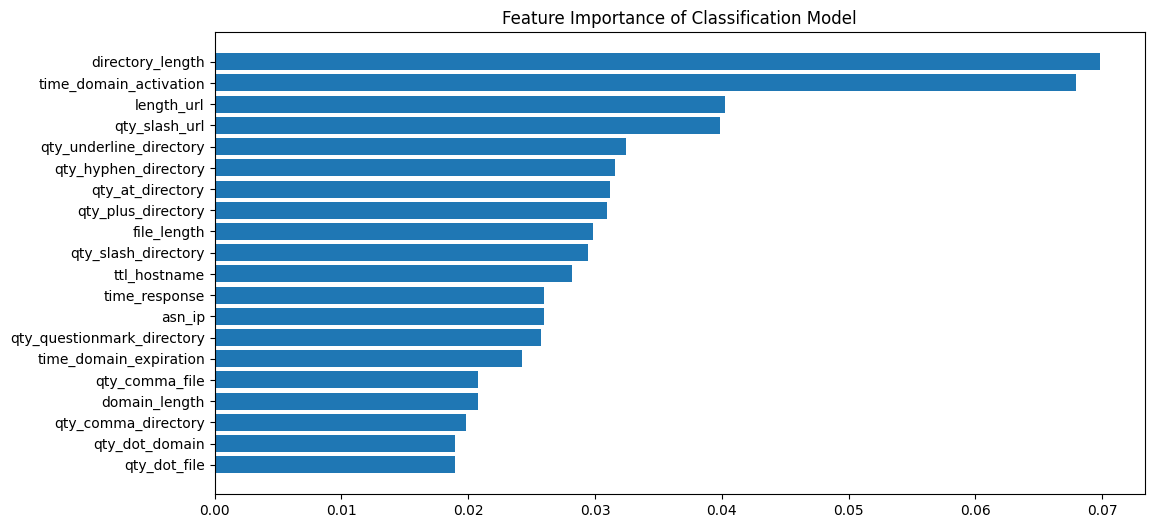

In [19]:
feat_importance(model, feat_cols)

## Confusion Matrix

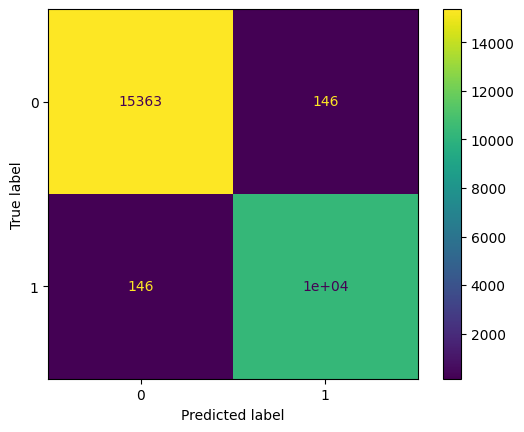

In [20]:
confusion_plot(y_test, y_pred)

## Precision-Recall

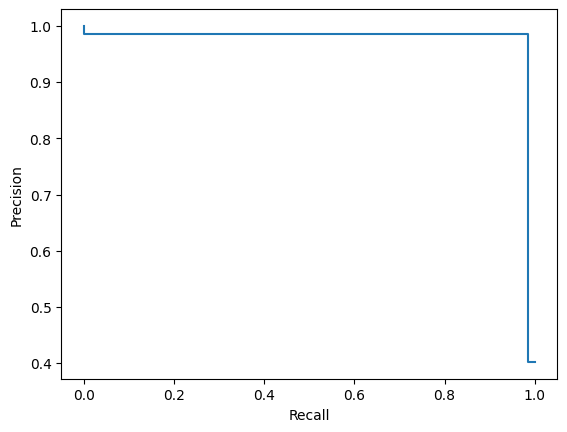

In [21]:
precision_recall(y_test, y_pred)

## ROC Curve

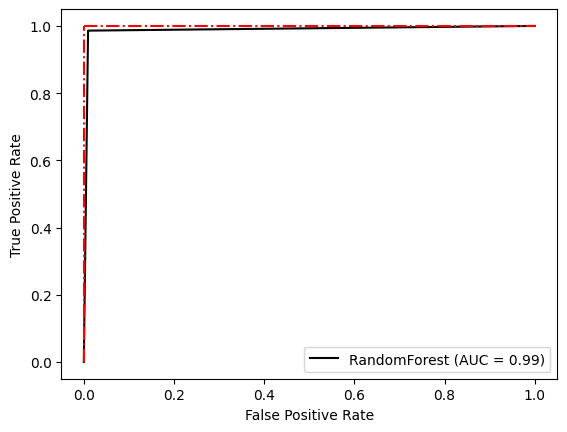

In [22]:
roc_curve(y_test, y_pred)

## Calibration Display

A perfectly calibrated model would have a calibration curve closely aligned with the 45-degree diagonal line on the plot. This line represents ideal calibration, where the **predicted probabilities match the observed frequencies**. Deviations from this diagonal line indicate either overconfidence or underconfidence in the model's predictions.

- Overconfidence: If the curve lies above the diagonal line, the model is overconfident. This means there are more instances with predicted probabilities close to 1 than there should be, and the model's confidence in its predictions is higher than the actual success rate.
- Underconfidence: If the curve lies below the diagonal line, the model is underconfident. In this case, instances with high predicted probabilities are less frequent than they should be and the model's confidence is lower than the actual success rate.

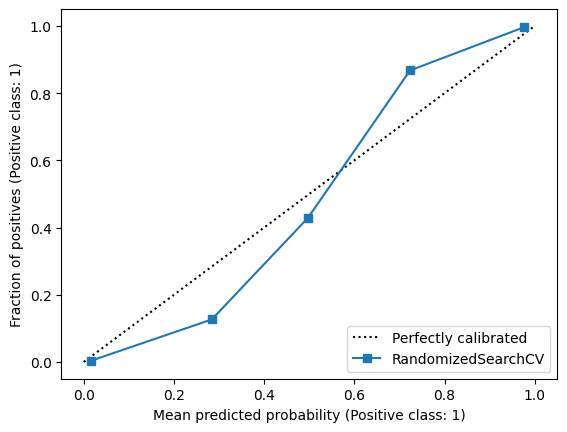

In [23]:
calibration_disp(model, X_test, y_test)

## Decision Boundary

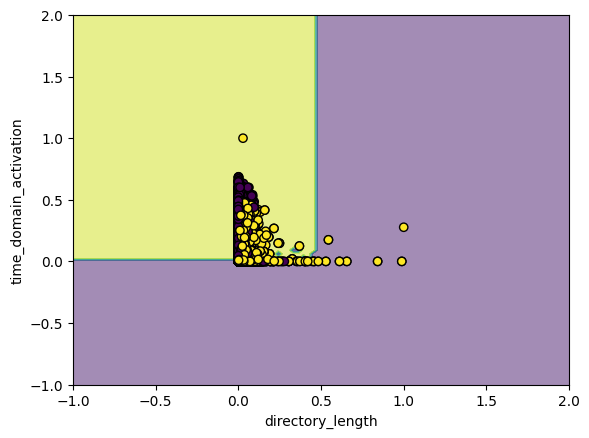

In [24]:
decision_boundary(model, best_params, X_train, y_train)

## Learning Curve

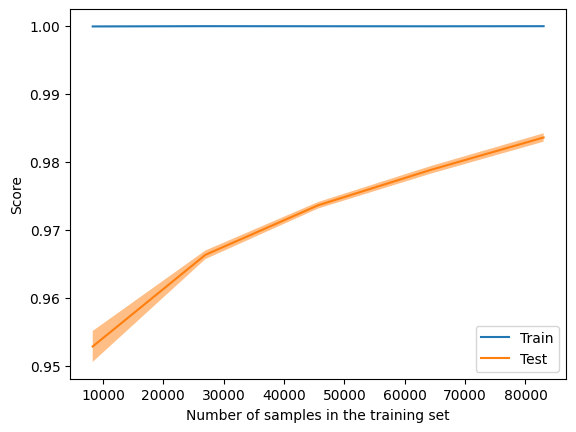

In [25]:
learning_curv(clf, X_train, y_train)